In [ ]:
%pip install igraph matplotlib --quiet

In [7]:
import igraph as ig
import matplotlib.pyplot as plt

# Hierarchical Clustering

Hierarchical clustering is a community detection method that creates a nested series of partitions, organizing communities into a hierarchy. Unlike other algorithms that provide a single, "flat" division of your network, hierarchical methods offer a more detailed view of community structure, revealing how smaller groups merge to form larger ones. The result of this process is a dendrogram, a tree-like diagram that visually represents the entire history of community merges or splits.

There are two primary approaches to hierarchical clustering:
* __Agglomerative (Bottom-Up):__ This method starts by treating each individual node as its own community. It then iteratively merges the most "similar" or "closest" communities until all nodes are part of a single large community.

* __Divisive (Top-Down):__ The opposite of the agglomerative approach, this method begins with the entire network as one large community. It then repeatedly splits the community by removing key edges, resulting in a hierarchy of smaller and smaller communities.

In `igraph`, the output of a hierarchical clustering method is a `VertexDendrogram` object. 

### Working `VertexDendrogram` objects

In [6]:
g = ig.Graph.Famous("Zachary")
dendrogram = g.community_edge_betweenness()

print("--- Dendrogram Summary ---")
print(dendrogram.summary())

--- Dendrogram Summary ---
Dendrogram, 34 elements, 33 merges


#### Visualizing the dendrogram
_NOTE:_ The orientation can be changed (e.g., "top-bottom", "left-right")

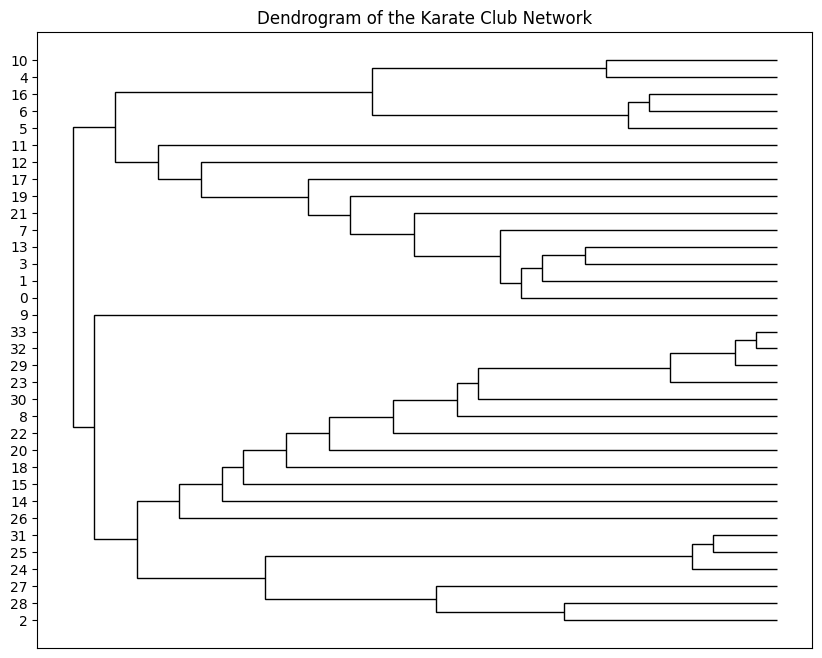

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
ig.plot(dendrogram, target=ax, orientation="right-left")
plt.title("Dendrogram of the Karate Club Network")
plt.show()

#### Getting the "optimal" community partition

To get the partition that the algorithm considers "optimal" (by maximizing modularity), we just simply call the `as_clustering()` method, which returns a `VertexClustering` object.
<div style="background-color: #e6ffe6; padding: 20px; border-radius: 5px;">
    
**NOTE:** You can find more details about **VertexClustering** [here](./vertex_clustering_object.ipynb).

</div>

In [12]:
optimal_partition = dendrogram.as_clustering()
print("--- Optimal Community Partition (maximizing modularity) ---")
print("Number of communities:", len(optimal_partition))
print("Modularity:", optimal_partition.modularity)
print(optimal_partition)

--- Optimal Community Partition (maximizing modularity) ---
Number of communities: 5
Modularity: 0.40129848783694944
Clustering with 34 elements and 5 clusters
[0] 0, 1, 3, 7, 11, 12, 13, 17, 19, 21
[1] 2, 24, 25, 27, 28, 31
[2] 4, 5, 6, 10, 16
[3] 8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33
[4] 9


#### Exploring different partitions

We can get clusterings with a specific number of communities, by passing `n` (number of clusters) as a parameter to the `as_clustering()` method.

In [13]:
# Get a partition with a different number of communities (e.g., 2 communities)
partition_2 = dendrogram.as_clustering(n=2)
print("\n--- Partition with 2 Communities ---")
print("Modularity:", partition_2.modularity)
print(partition_2)

# Get a partition with a different number of communities (e.g., 5 communities)
partition_5 = dendrogram.as_clustering(n=5)
print("\n--- Partition with 5 Communities ---")
print("Modularity:", partition_5.modularity)
print(partition_5)


--- Partition with 2 Communities ---
Modularity: 0.3599605522682447
Clustering with 34 elements and 2 clusters
[0] 0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21
[1] 2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33

--- Partition with 5 Communities ---
Modularity: 0.40129848783694944
Clustering with 34 elements and 5 clusters
[0] 0, 1, 3, 7, 11, 12, 13, 17, 19, 21
[1] 2, 24, 25, 27, 28, 31
[2] 4, 5, 6, 10, 16
[3] 8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33
[4] 9
